# Background Information and Problem Statement

This pima dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. With this data set, we will predict whether or not a patient has diabetes, based on certain diagnostic measurements on several medical predictors such as number of pregnancies the patient has had, their BMI, insulin level, age etc.

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Import Libraries

In [1]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

%matplotlib inline

# Import libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import binarize

# Import libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Import libraries for model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_curve

## Load Data and Inspect Data Structure

In [2]:
# Load data
pima = pd.read_csv('pima-data.csv', na_values = [''])
pima.shape #data dimensions

(768, 10)

In [3]:
# First 5 rows of data
pima.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [4]:
# Last 5 rows of data
pima.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [5]:
# Check for missing values
pima.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

## Understand Correlation Among Predictors

In [6]:
pima_corr = pima.drop(['diabetes'], axis=1)
pima_corr.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin'],
      dtype='object')

In [7]:
pima_corr.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000


In [8]:
pima = pima.drop(['skin'], axis=1)
pima.shape

(768, 9)

## Baseline Logistic Regression Model

In [9]:
pima['diabetes'].value_counts()

False    500
True     268
Name: diabetes, dtype: int64

This is an imbalanced classification problem

In [10]:
max(pima['diabetes'].mean(), 1-pima['diabetes'].mean())

0.65104166666666674

If a dumb model was to always predict that a patient did not have diabetes, it will be correct 65% of the time. This 65% is the null accuracy

## Data Preprocessing

In [11]:
# Encode target variables
pima['diabetes'] = pima['diabetes'].map({True:1, False:0})

In [12]:
# Target variable
y = pima['diabetes']
y.shape

(768,)

In [13]:
# Predictors
X = pima.drop(['diabetes'], axis = 1)
X.shape

(768, 8)

In [14]:
feature_cols = X.columns
feature_cols

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age'],
      dtype='object')

In [15]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y,  stratify=y, random_state = 0) #75% Train, 25% Test

In [16]:
print(X_train.shape); y_train.shape

(576, 8)


(576,)

## Logistic Regression Model

In [17]:
# Instantiate model
logreg = LogisticRegression() 

In [18]:
# Fit model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
# Make predictions
y_pred_lr = logreg.predict(X_test)

In [20]:
logreg.coef_

array([[  1.07831794e-01,   2.37996099e-02,  -1.54219806e-02,
         -2.02405847e-03,   4.25140589e-04,   5.07169932e-02,
          6.36036665e-01,   1.13422218e-02]])

In [21]:
logreg.intercept_

array([-5.23382338])

In [22]:
list(zip(feature_cols, logreg.coef_))

[('num_preg', array([  1.07831794e-01,   2.37996099e-02,  -1.54219806e-02,
          -2.02405847e-03,   4.25140589e-04,   5.07169932e-02,
           6.36036665e-01,   1.13422218e-02]))]

In [23]:
# Evaluate predictions using classification accuracy
accuracy_score(y_test, y_pred_lr)

0.77604166666666663

This can't be trusted as there is a higher distribution of one class over another so the model will more likely learn more about the majority class and make predictions based on that. For that matter, we will observe the confusion matrix to understand the kind of errors made here

In [24]:
# Evaluate predictions using confusion matrix
pd.crosstab(y_test, y_pred_lr, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,110,15
1,28,39


Wrongly predicting a diabetic patient as not having diabetes is more costly than the converse. So we will calculate the recall score for this model

In [25]:
# Evaluation using recall
recall_score(y_test, y_pred_lr)

0.58208955223880599

## Visualizing Predicted Probability

In [26]:
y_prob_lr = logreg.predict_proba(X_test)

In [27]:
# Comparing predicted class vs predicted probability at 0.5 threshold
list(zip(y_prob_lr[1:10, 1], y_pred_lr[1:10]))

[(0.17771433999093506, 0),
 (0.20464137141458202, 0),
 (0.16664354191554084, 0),
 (0.1925379130362076, 0),
 (0.4893372367638682, 0),
 (0.67516375716236499, 1),
 (0.21594283686325402, 0),
 (0.54637305544863601, 1),
 (0.34719349339430949, 0)]

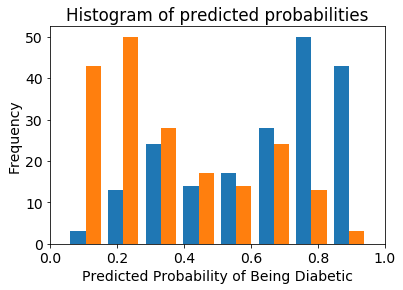

In [28]:
plt.rcParams['font.size'] = 14

#histogram of predicted prob
plt.hist(y_prob_lr, bins = 8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted Probability of Being Diabetic') 
plt.ylabel('Frequency')

## Adjusting Classification Threshold

In [29]:
y_prob_lr_adj = binarize(y_prob_lr, 0.3)

In [30]:
list(zip(y_prob_lr_adj[1:10, 1], y_pred_lr[1:10]))

[(0.0, 0),
 (0.0, 0),
 (0.0, 0),
 (0.0, 0),
 (1.0, 0),
 (1.0, 1),
 (0.0, 0),
 (1.0, 1),
 (1.0, 0)]

## ROC/AUC Curve

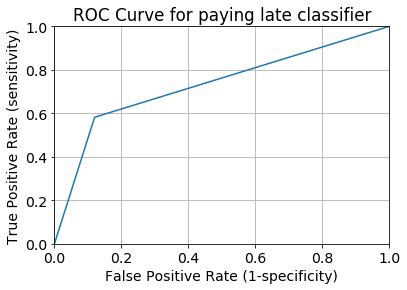

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for paying late classifier')
plt.xlabel('False Positive Rate (1-specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.grid(True)

In [32]:
#Random Forest Model
np.random.seed(0)

rf = RandomForestClassifier() #

# Train the Classifier to take the training features and learn how they relate
# to the training y
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
y_pred_rf = rf.predict(X_test) #predict response for test data

In [34]:
confusion_matrix(y_test, y_pred_rf) #confusion matrix

array([[105,  20],
       [ 31,  36]], dtype=int64)

In [35]:
pd.crosstab(y_test, y_pred_rf, rownames=['Actual Pay Status'], colnames=['Predicted Pay Status']) #confusion matrix

Predicted Pay Status,0,1
Actual Pay Status,,
0,105,20
1,31,36


In [36]:
recall_score(y_test, y_pred_rf)

0.53731343283582089

In [37]:
list(zip(X_train, rf.feature_importances_)) #variable importance

[('num_preg', 0.074374044979024417),
 ('glucose_conc', 0.23004217402224078),
 ('diastolic_bp', 0.077866798619659575),
 ('thickness', 0.090529748005546112),
 ('insulin', 0.074377276169250425),
 ('bmi', 0.16888290816045015),
 ('diab_pred', 0.12942596509615159),
 ('age', 0.15450108494767695)]

Most predictive variables: glucose concentration, body mass index, age, diabetes pedigree function, skin thickness, diastolic blood pressure, insulin, number of pregnancies